# **Solution Report**

# **Introduction**

Coronary artery disease (CAD) is a condition in which the arteries that supply blood to the heart muscle become hardened and narrowed due to the buildup of plaque. This buildup of plaque, known as atherosclerosis, causes the arteries to become less flexible and progressively narrowed, limiting blood flow to the heart. CAD is the most common type of cardiovascular disease and a leading cause of death worldwide. The three main coronary arteries at risk for atherosclerotic narrowing are the left main coronary artery, left anterior descending artery, and right coronary artery. When the coronary arteries become narrowed by 50% or more, blood flow to the heart is reduced, depriving the heart muscle of oxygen and nutrients. This can result in chest pain (angina), shortness of breath, heart attack, and other symptoms. CAD develops gradually over many years and can go undetected for a long time. However, early detection through screening and diagnostic tests allows for lifestyle changes and medical therapy to potentially slow progression. Advanced CAD may require procedures like angioplasty or coronary artery bypass surgery to reopen blocked arteries and restore blood supply to the heart. Managing risk factors like high cholesterol, diabetes, smoking, and hypertension can help prevent CAD.

**Proposed Approach**

We will develop machine learning models to predict coronary artery disease (CAD) risk using the Z-Alizadeh Sani dataset. This dataset contains 303 samples (216 CAD patients, 87 normal controls) with 55 features. It includes comprehensive variables across four categories:

- Demographics: age, sex, BMI, smoking status, comorbidities, etc.
- Symptoms and clinical exam findings: chest pain, shortness of breath, murmurs, edema.
- ECG results: rhythm, ST changes, arrhythmias.
- Lab and echo results: Lipids, electrolytes, ejection fraction.

**Key strengths of this dataset:**
- Complete with no missing data
- Includes all major variables relevant for CAD assessment
- Publicly available from UCI repository
- Frequently used in ML research for CAD detection

Key variables like age, sex, blood pressure, cholesterol levels, and ECG results are known CAD risk factors and will be included in modeling. Machine learning algorithms including logistic regression, and support vector machines will be tested given their proven effectiveness for classification tasks.

**Evaluation Metrics**

Model performance will be evaluated using accuracy, AUC, sensitivity, specificity, and F1-score. These metrics will assess the ability to correctly classify CAD cases versus controls. Models will be validated using repeated cross-validation.
- Data preprocessing: Handling missing data, outlier removal, categorical encoding, feature scaling.
- Model implementation: Training and tuning logistic regression, SVM models for CAD prediction.
- Addressing challenges: Sampling methods if needed to address class imbalance; feature selection to remove redundancies.
- Performance evaluation: Compare models on validation metrics to identify optimal approach. Analyze feature importance.
Expected Outcomes

This work will demonstrate machine learning techniques for leveraging demographic, clinical, and ECG data to predict CAD risk. The top-performing model should achieve accuracy >80% based on prior literature. Results will provide insights into the most predictive variables and ML methods for early CAD screening.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/My Drive/ai/CAD dataset.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Loading Important Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, balanced_accuracy_score


In [3]:
# Importing Datasets
df = pd.read_excel(data_path)

# **EDA**

In [4]:
# Display Colunms
df.columns

Index(['Age', 'Weight', 'Length', 'Sex', 'BMI', 'DM', 'HTN', 'Current Smoker',
       'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease',
       'Thyroid Disease', 'CHF', 'DLP', 'BP', 'PR', 'Edema',
       'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur',
       'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class',
       'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave',
       'St Elevation', 'St Depression', 'Tinversion', 'LVH',
       'Poor R Progression', 'BBB', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN',
       'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE',
       'Region RWMA', 'VHD', 'LAD', 'LCX', 'RCA', 'Cath'],
      dtype='object')

In [5]:
# Print shape of the DataFrame (number of rows, number of columns)
print(f"Dataset: {len(df)} rows X {len(df.columns)} columns")

Dataset: 303 rows X 59 columns


In [6]:
# Print data types of each column
print("Data Types:", df.dtypes)

Data Types: Age                        int64
Weight                     int64
Length                     int64
Sex                       object
BMI                      float64
DM                         int64
HTN                        int64
Current Smoker             int64
EX-Smoker                  int64
FH                         int64
Obesity                   object
CRF                       object
CVA                       object
Airway disease            object
Thyroid Disease           object
CHF                       object
DLP                       object
BP                         int64
PR                         int64
Edema                      int64
Weak Peripheral Pulse     object
Lung rales                object
Systolic Murmur           object
Diastolic Murmur          object
Typical Chest Pain         int64
Dyspnea                   object
Function Class             int64
Atypical                  object
Nonanginal                object
Exertional CP             objec

In [7]:
# Check for missing values
missing_values = df.isnull().sum()

# If there are no missing values, the sum of missing values will be 0
if missing_values.sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("The dataset contains missing values.")

There are no missing values in the dataset.


In [8]:
duplicates = df[df.duplicated()]
print("Duplicate Rows:", duplicates)

Duplicate Rows: Empty DataFrame
Columns: [Age, Weight, Length, Sex, BMI, DM, HTN, Current Smoker, EX-Smoker, FH, Obesity, CRF, CVA, Airway disease, Thyroid Disease, CHF, DLP, BP, PR, Edema, Weak Peripheral Pulse, Lung rales, Systolic Murmur, Diastolic Murmur, Typical Chest Pain, Dyspnea, Function Class, Atypical, Nonanginal, Exertional CP, LowTH Ang, Q Wave, St Elevation, St Depression, Tinversion, LVH, Poor R Progression, BBB, FBS, CR, TG, LDL, HDL, BUN, ESR, HB, K, Na, WBC, Lymph, Neut, PLT, EF-TTE, Region RWMA, VHD, LAD, LCX, RCA, Cath]
Index: []

[0 rows x 59 columns]


Categorical variables can be organized into five distinct groups:
- Patient Characteristics,
- Underlying Disease,
- Physical Examination Findings,
- Symptoms,
- ECG Data.

Each group contributes valuable information for understanding a patient's health status and guiding treatment decisions.

In [9]:
# Patient Characteristics
Pchar = ['Sex', 'Current Smoker', 'EX-Smoker', 'FH']

# Underlying disease
ud = ['DM', 'HTN', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP']

# Physical exam
pe = ['Edema', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur']

# Symptoms
sy = ['Typical Chest Pain', 'Dyspnea', 'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang']

# ECG Data
ecg = ['Q Wave', 'St Elevation', 'St Depression', 'Tinversion', 'LVH', 'Poor R Progression']

<ipython-input-10-5aab909204d3>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[relevant_vars].corr()


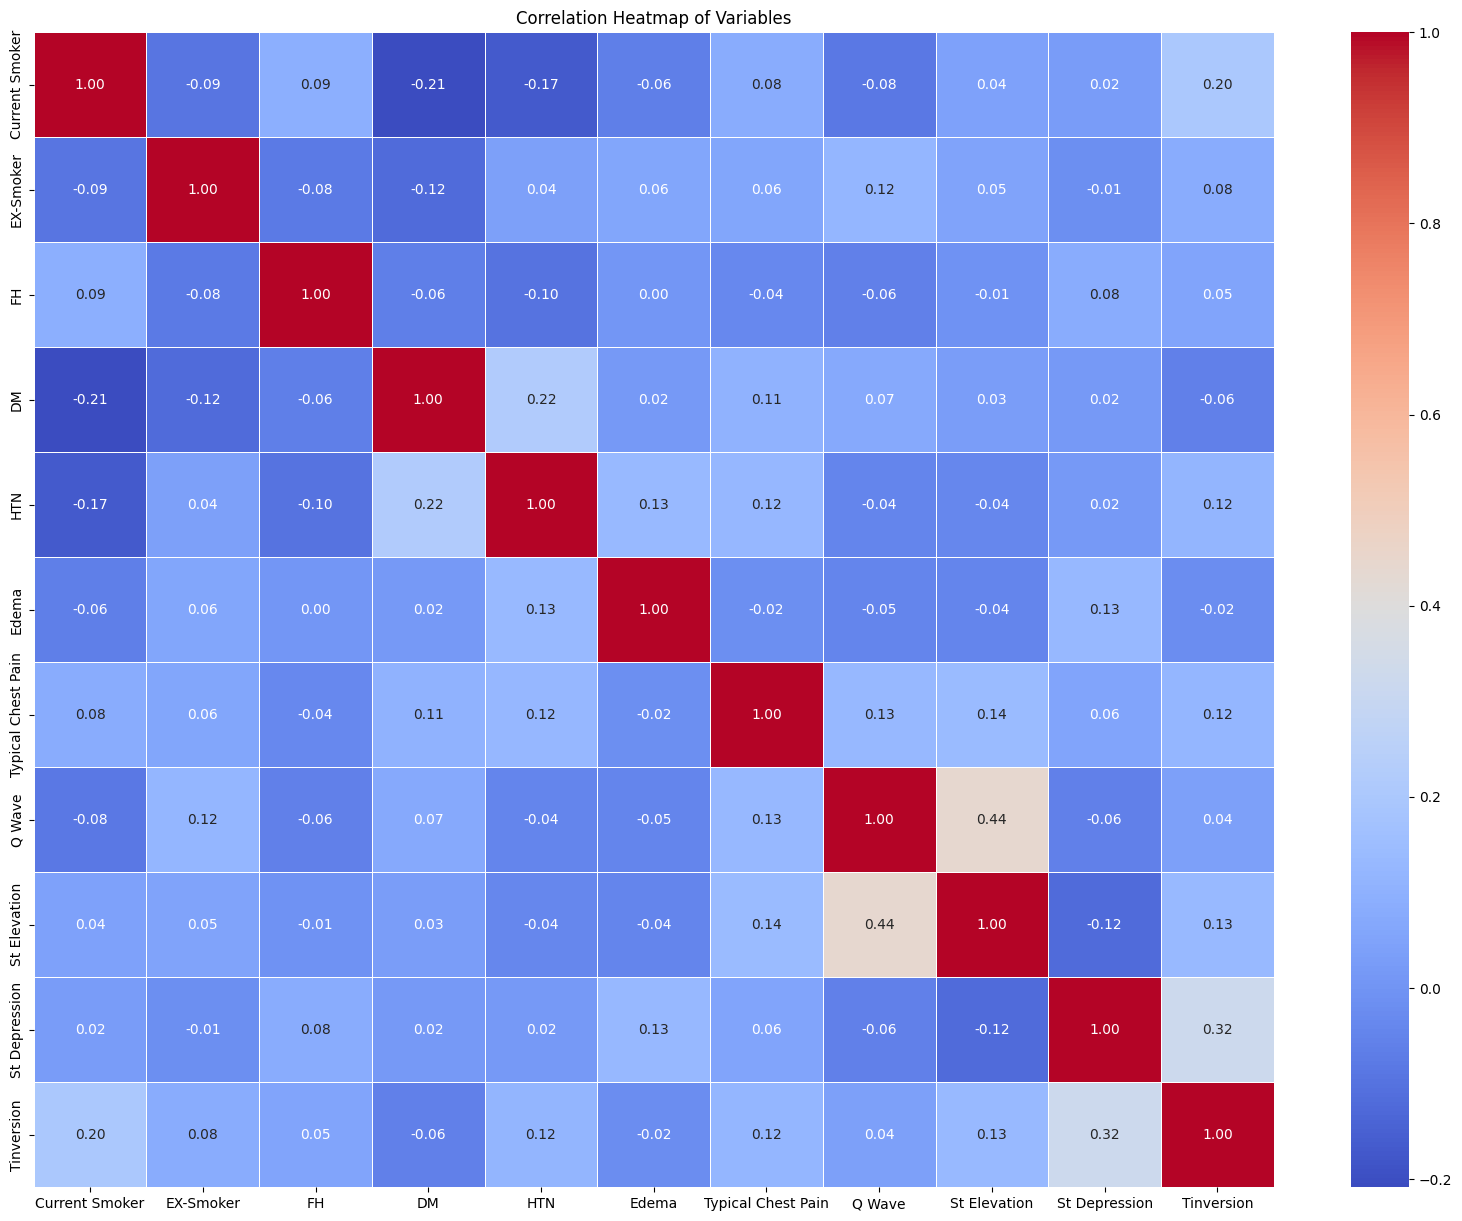

In [10]:
# Group variables for correlation analysis
relevant_vars = Pchar + ud + pe + sy + ecg

# Calculate pairwise correlations
corr_matrix = df[relevant_vars].corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Variables')
plt.show()

In [11]:
# Display unique values in 'Cath' column
print("Unique values in 'Cath' column:", df['Cath'].unique())

# Encode 'Cath' column with CAD as 1 and Normal as 0
df['Cath_Encoded'] = df['Cath'].map({'CAD': 1, 'Normal': 0})

Unique values in 'Cath' column: ['CAD' 'Normal']


<ipython-input-12-0b611c32c63b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cad_corr = df.corr()


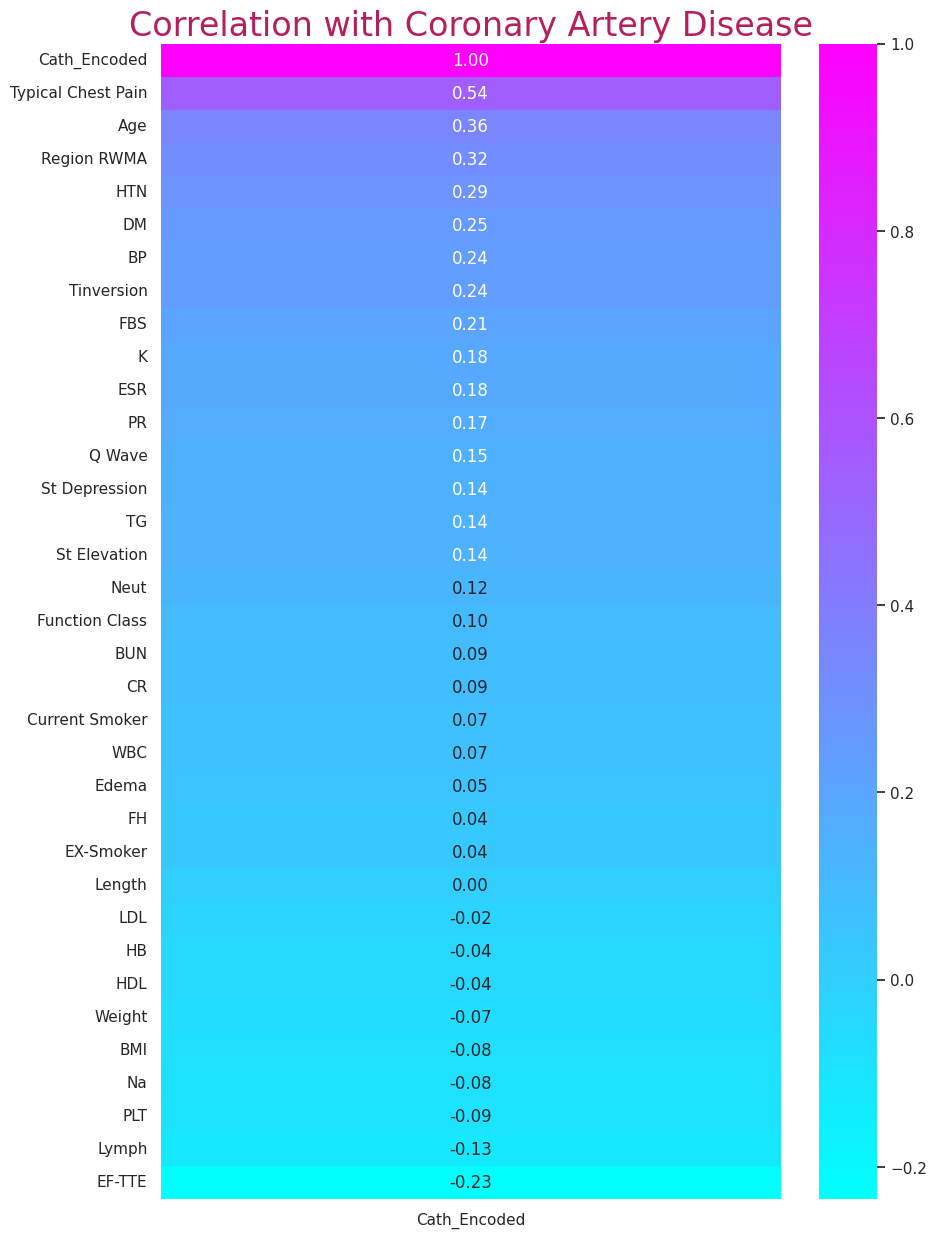

In [12]:
#Correlation with Coronary Artery Disease
# Calculate correlation
cad_corr = df.corr()
cad_to_corr = cad_corr['Cath_Encoded'].sort_values(ascending=False)

# Plot heatmap
plt.figure(figsize=(10,15))
sns.set(font_scale=1.0)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(cad_to_corr.to_frame(), cmap=plt.cm.cool, annot=True, fmt='.2f')
plt.title("Correlation with Coronary Artery Disease", fontsize=24,color='#b71f5c')
plt.show()

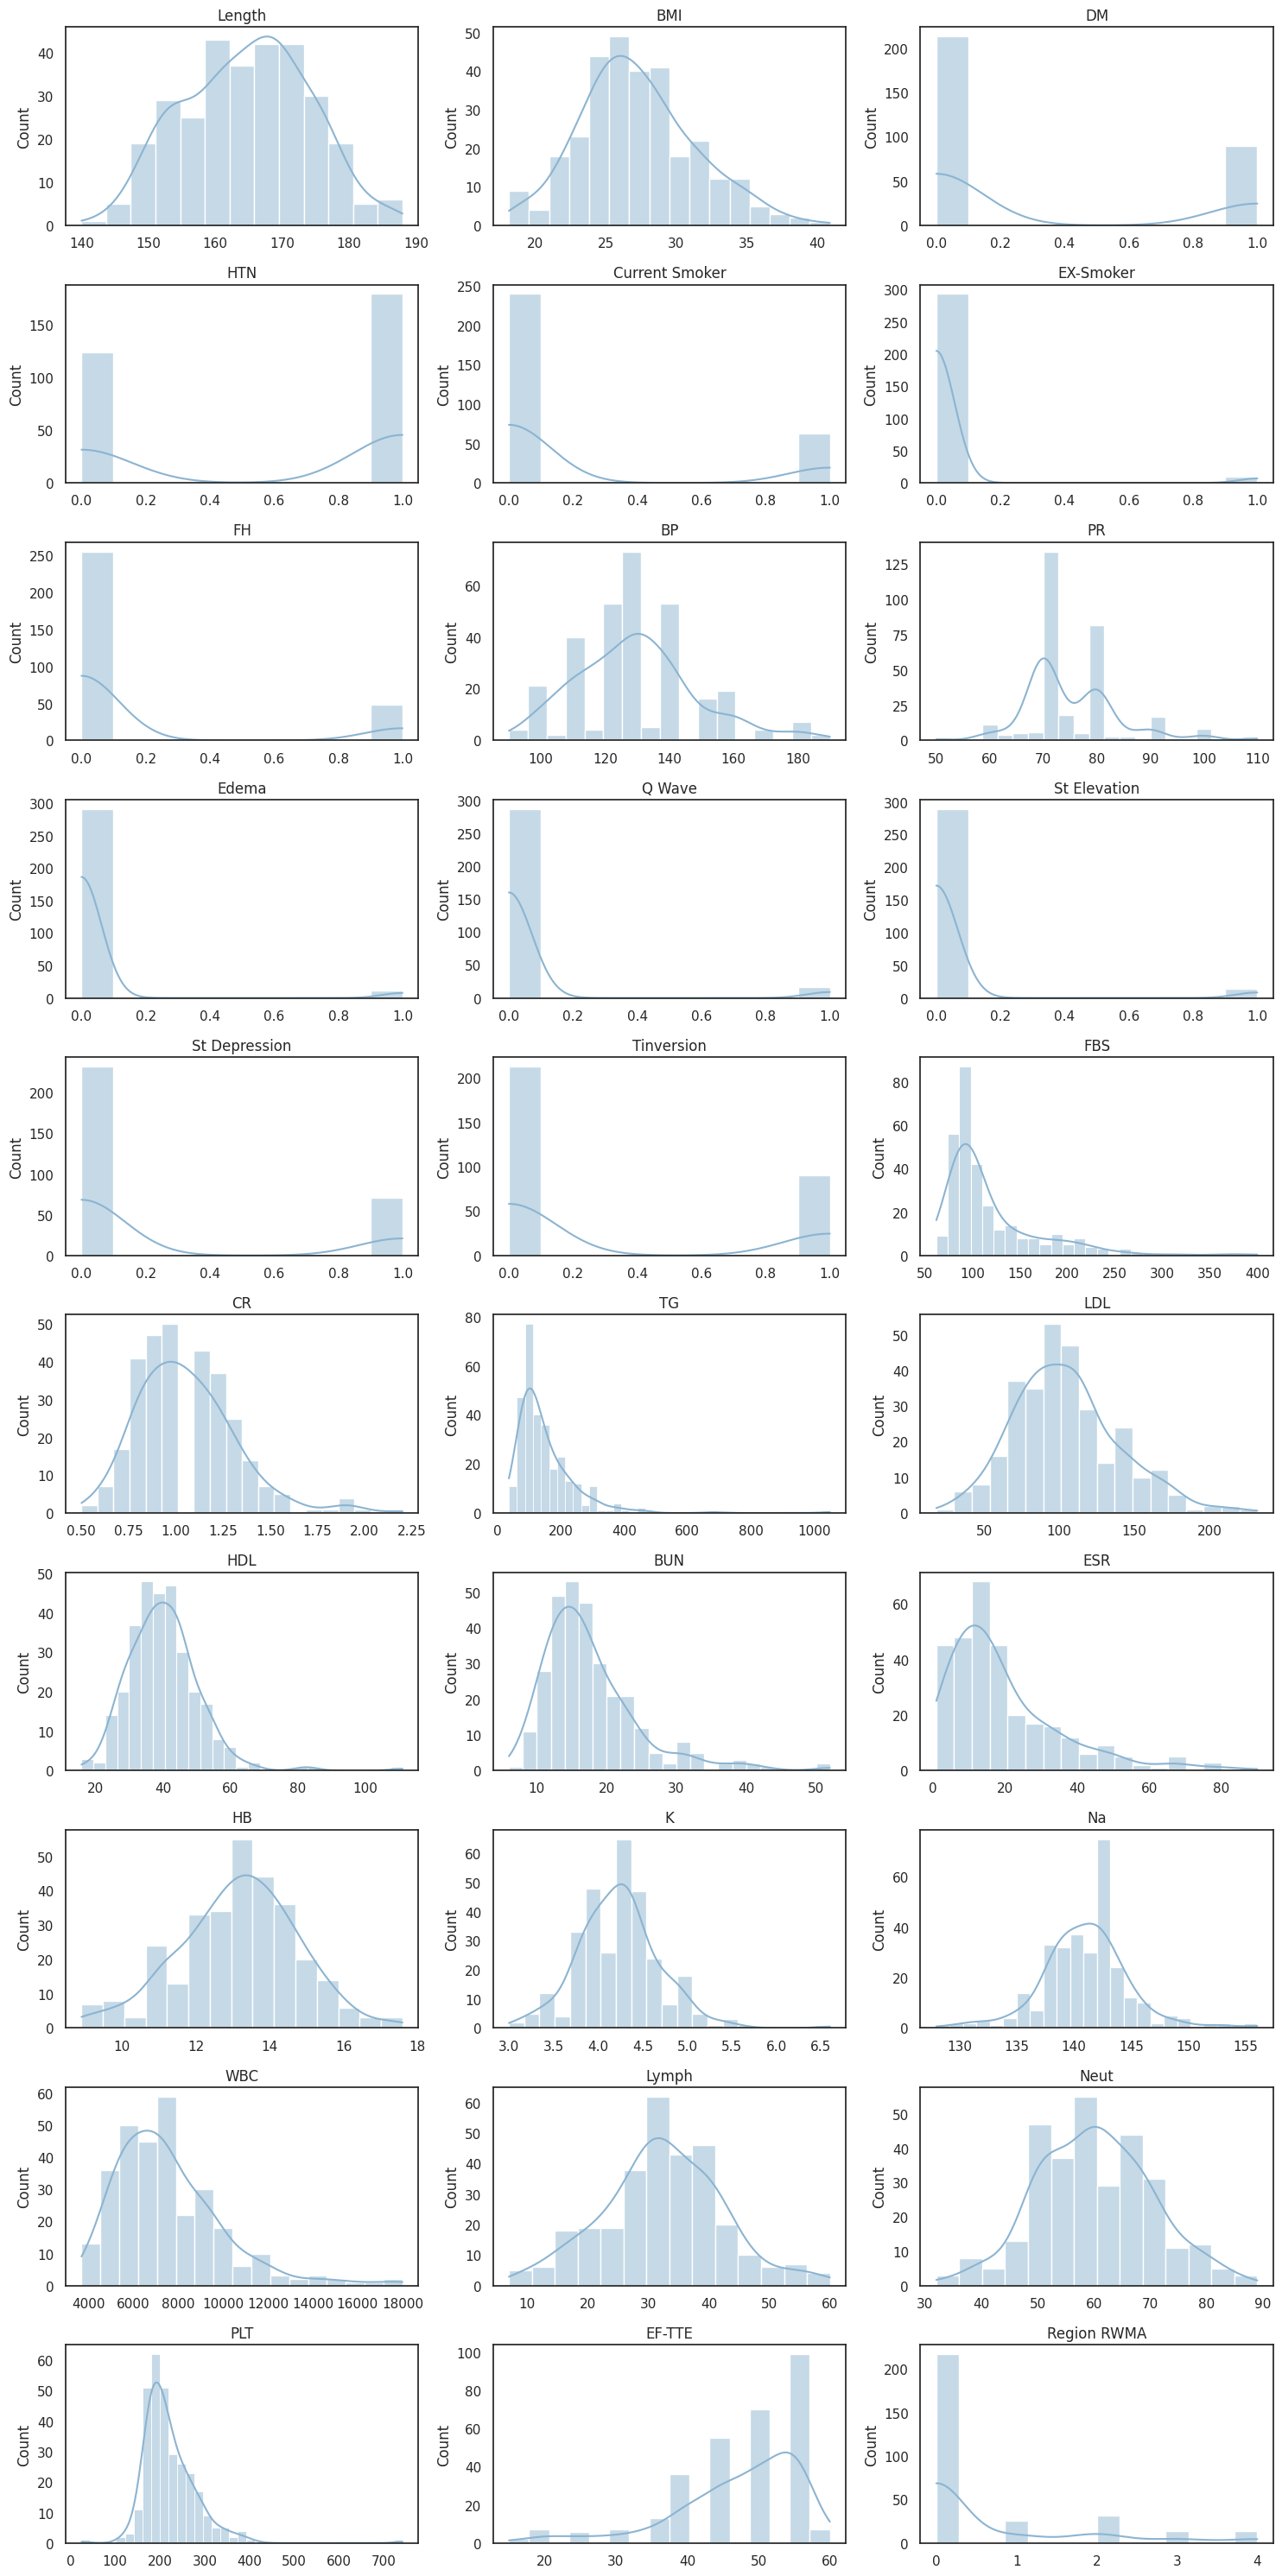

In [13]:
# Select relevant variables for visualization
relevant_vars = ['Length', 'BMI', 'DM', 'HTN', 'Current Smoker', 'EX-Smoker', 'FH', 'BP', 'PR', 'Edema', 'Q Wave',
                 'St Elevation', 'St Depression', 'Tinversion', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB',
                 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE', 'Region RWMA']

# Plot histograms for each variable
plt.figure(figsize=(15, 30))
for i, var in enumerate(relevant_vars, 1):
    plt.subplot(10, 3, i)
    sns.histplot(df[var], kde=True)
    plt.title(var)
    plt.xlabel('')
plt.tight_layout()
plt.show()

# Preprocessing

In [14]:
# Select relevant variables for standardization
relevant_vars = ['Length', 'BMI', 'DM', 'HTN', 'Current Smoker', 'EX-Smoker', 'FH', 'BP', 'PR', 'Edema', 'Q Wave',
                 'St Elevation', 'St Depression', 'Tinversion', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB',
                 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE', 'Region RWMA']

# Create a subset of the dataset with relevant variables
df_subset = df[relevant_vars]

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the variables
df_scaled = pd.DataFrame(scaler.fit_transform(df_subset), columns=relevant_vars)

Class counts:
CAD       216
Normal     87
Name: Cath, dtype: int64


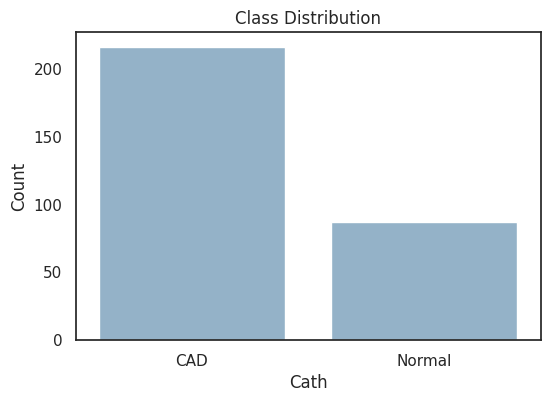

Class ratios:
CAD       0.712871
Normal    0.287129
Name: Cath, dtype: float64


In [15]:
# Count of each class
class_counts = df['Cath'].value_counts()
print("Class counts:")
print(class_counts)

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Cath')
plt.title('Class Distribution')
plt.xlabel('Cath')
plt.ylabel('Count')
plt.show()

# Check class ratios
class_ratios = class_counts / len(df)
print("Class ratios:")
print(class_ratios)

Class counts after oversampling:
1    216
0    216
Name: Cath_Encoded, dtype: int64


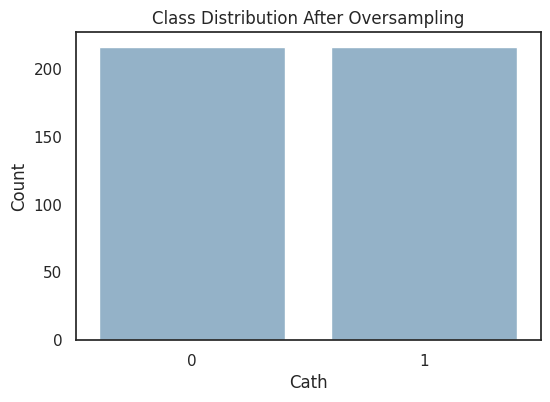

In [16]:
# Separate features and target variable
X = df.drop(columns=['Cath', 'Cath_Encoded'])  # Features
y = df['Cath_Encoded']  # Target variable

# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Perform oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Count of each class after oversampling
class_counts_resampled = pd.Series(y_resampled).value_counts()
print("Class counts after oversampling:")
print(class_counts_resampled)

# Visualize class distribution after oversampling
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After Oversampling')
plt.xlabel('Cath')
plt.ylabel('Count')
plt.show()

In [17]:
# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)

Import necessary libraries and modules for preprocessing, modeling, and evaluation, Separate the features (X) and target variable (y) from the dataset, Split the data into training and testing sets using train_test_split.

In [18]:
# Separate features and target variable
X = df.drop(columns=['Cath', 'Cath_Encoded'])  # Features
y = df['Cath_Encoded']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Identify categorical and numerical columns in the feature dataset (X).

In [19]:
# Select categorical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Select numerical columns
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

- Define preprocessing steps for numerical and categorical data using pipelines.
- Impute missing values (numerical: mean, categorical: most frequent) and scale numerical features.
- Encode categorical features using one-hot encoding.
- Bundle preprocessing steps for both numerical and categorical data using ColumnTransformer.

In [20]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Prediction Analysis

Perform oversampling of the training data using RandomOverSampler to balance the classes.

In [21]:
# Oversampling the training data
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

Pipelines for SVM classifier with preprocessing steps and classifie

In [22]:
pipe_svm = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC())])
pipe_svm.fit(X_train_resampled, y_train_resampled)
y_pred_svm = pipe_svm.predict(X_test)
print("SVM - Test classification report:", classification_report(y_test, y_pred_svm))

SVM - Test classification report:               precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.96      1.00      0.98        43

    accuracy                           0.97        61
   macro avg       0.98      0.94      0.96        61
weighted avg       0.97      0.97      0.97        61



The classification report indicates strong performance of the Support Vector Machine (SVM) model on the test set for detecting coronary artery disease (CAD). The model achieved an overall accuracy of 97%, correctly classifying 97% of samples.

For the normal class, the model demonstrated high precision of 1.00, recall of 0.89, and F1-score of 0.94. This shows the model rarely misclassified normal samples as CAD, though it missed some actual normal cases.

For the CAD class, precision was 0.96, recall was 1.00, and F1-score was 0.98. This indicates nearly all CAD cases were correctly identified, with few false positives.

The macro-average scores consider performance per class equally, giving average precision of 0.98, recall of 0.94, and F1-score of 0.96. The weighted-average scores account for class imbalance, giving precision of 0.97, recall of 0.97, and F1-score of 0.97.

In summary, the SVM model shows robust predictive performance across accuracy, precision, recall, and F1-score for both classes. The high scores demonstrate reliable identification of CAD versus normal cases on the test set.

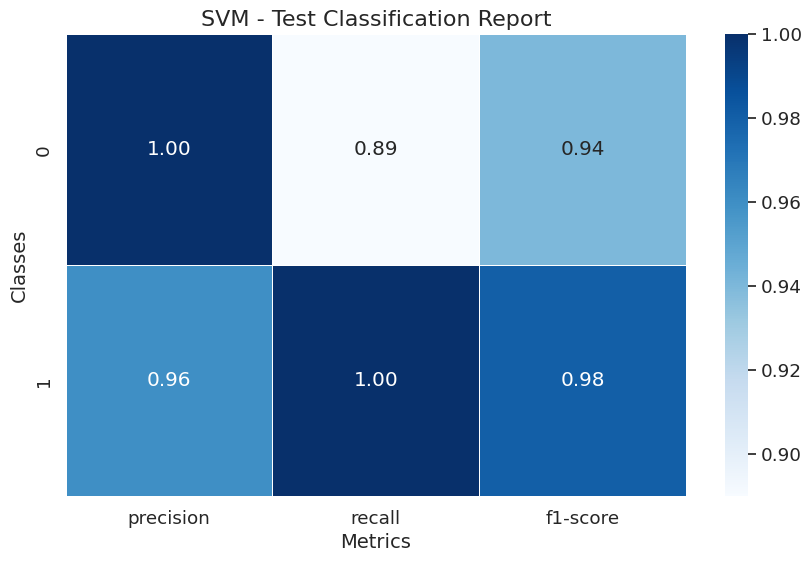

In [23]:
# Define the classification report values
report_data = {'precision': [1.00, 0.96],
               'recall': [0.89, 1.00],
               'f1-score': [0.94, 0.98]}

# Convert the report data into a DataFrame
report_df = pd.DataFrame(report_data, index=['0', '1'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.heatmap(report_df, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('SVM - Test Classification Report', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Classes', fontsize=14)
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, balanced_accuracy_score

X_train_encoded = encoder.fit_transform(X_train_resampled)
# Define logistic regression model
lr_model = LogisticRegression()

# Define a scorer for balanced accuracy
scorer = make_scorer(balanced_accuracy_score)

# Perform cross-validation for Logistic Regression
lr_cv_scores = cross_val_score(lr_model, X_train_encoded, y_train_resampled, cv=5, scoring=scorer)

# Print cross-validation scores for Logistic Regression
print("Logistic Regression - Cross-validation scores:")
print("Mean Balanced Accuracy:", lr_cv_scores.mean())
print("Standard Deviation:", lr_cv_scores.std())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Logistic Regression - Cross-validation scores:
Mean Balanced Accuracy: 0.9794117647058824
Standard Deviation: 0.028817526385684432


Cross-validation is a technique used to evaluate machine learning models on a limited dataset. It involves splitting the data into different subsets called folds, training the model on some folds and testing it on the holdout folds. This is repeated across different permutations of train-test splits.

Two key metrics are calculated during cross-validation for a classification model like logistic regression:

- Mean Balanced Accuracy - This metric calculates the accuracy of the model while accounting for class imbalance in the dataset. Specifically, it calculates accuracy for each class separately and then takes the average, avoiding bias towards the majority class. The mean balanced accuracy reported here is 0.979. This indicates that on average, across the different cross-validation folds, the logistic regression model achieved a balanced accuracy of 97.9%. In other words, the model was able to correctly classify around 97% of samples on average, despite class imbalance. A higher value indicates better performance.

- Standard Deviation - This measures the variability in the balanced accuracy scores across the different folds. A lower standard deviation indicates the model's performance was more consistent across the various cross-validation iterations. The standard deviation here is relatively low, indicating the logistic regression model performed reliably and did not suffer from high variance across different subsets of the data.

In summary, the high mean balanced accuracy of 97.1% and low standard deviation demonstrates that the logistic regression model can robustly classify the data despite any class imbalance, and performs consistently well across different train-test splits. This provides evidence that the model is likely to generalize accurately to new unseen data.

  # **References:**

Alizadehsani,Roohallah, Roshanzamir,Mohamad, and Sani,Zahra. (2017). Z-Alizadeh Sani. UCI Machine Learning Repository. https://doi.org/10.24432/C5Q31T.